In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers


batch_size = 32
img_size = (224,224)
img_shape = (224,224,3)

train = image_dataset_from_directory('/content/drive/MyDrive/DATA/Train/',
                                     shuffle = True,
                                     batch_size = batch_size,
                                     image_size = img_size)

test = image_dataset_from_directory('/content/drive/MyDrive/DATA/Test/',
                                     shuffle = True,
                                     batch_size = batch_size,
                                     image_size = img_size)

val = image_dataset_from_directory('/content/drive/MyDrive/DATA/Valid',
                                     shuffle = True,
                                     batch_size = batch_size,
                                     image_size = img_size)

import matplotlib.pyplot as plt
import numpy

train_class = train.class_names

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    layers.RandomRotation(0.1),
  ]
)

# Membuat objek model VGG16
vgg16 = VGG16(include_top=False, weights=None, input_shape=(224, 224, 3))

# Mengunci semua lapisan pada VGG16 agar tidak terlatih ulang
for layer in vgg16.layers:
    layer.trainable = False

# Membuat model baru berdasarkan VGG16
model = Sequential()
model.add(data_augmentation)
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Melatih model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train, epochs=30, validation_data=val)

# Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(test)
print('Test accuracy:', test_acc)


Found 106 files belonging to 3 classes.
Found 14 files belonging to 3 classes.
Found 14 files belonging to 3 classes.
Epoch 1/50
4/4 [==============================] - 3s 219ms/step - loss: 8.6127 - accuracy: 0.4151 - val_loss: 7.3836 - val_accuracy: 0.5714
Epoch 2/50
4/4 [==============================] - 1s 146ms/step - loss: 5.9382 - accuracy: 0.5755 - val_loss: 1.3593 - val_accuracy: 0.5714
Epoch 3/50
4/4 [==============================] - 1s 144ms/step - loss: 1.9962 - accuracy: 0.3396 - val_loss: 0.7816 - val_accuracy: 0.7857
Epoch 4/50
4/4 [==============================] - 1s 144ms/step - loss: 1.1361 - accuracy: 0.6509 - val_loss: 1.1394 - val_accuracy: 0.7143
Epoch 5/50
4/4 [==============================] - 1s 145ms/step - loss: 0.8492 - accuracy: 0.7075 - val_loss: 0.8533 - val_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 2s 208ms/step - loss: 0.7494 - accuracy: 0.7358 - val_loss: 0.9671 - val_accuracy: 0.7143
Epoch 7/50
4/4 [==========================

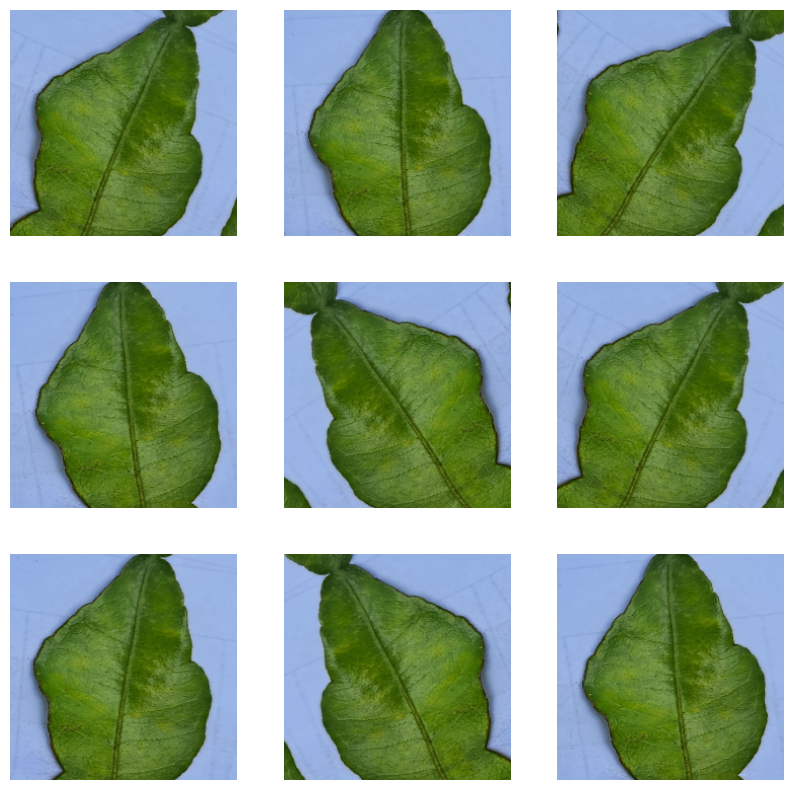

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory


batch_size = 32
img_size = (656,456)
img_shape = (656,456,3)

train = image_dataset_from_directory('/content/drive/MyDrive/DATA/Train/',
                                     shuffle = True,
                                     batch_size = batch_size,
                                     image_size = img_size)

test = image_dataset_from_directory('/content/drive/MyDrive/DATA/Test/',
                                     shuffle = False,
                                     batch_size = batch_size,
                                     image_size = img_size)

val = image_dataset_from_directory('/content/drive/MyDrive/DATA/Valid',
                                     shuffle = True,
                                     batch_size = batch_size,
                                     image_size = img_size)

Found 106 files belonging to 3 classes.
Found 14 files belonging to 3 classes.
Found 14 files belonging to 3 classes.


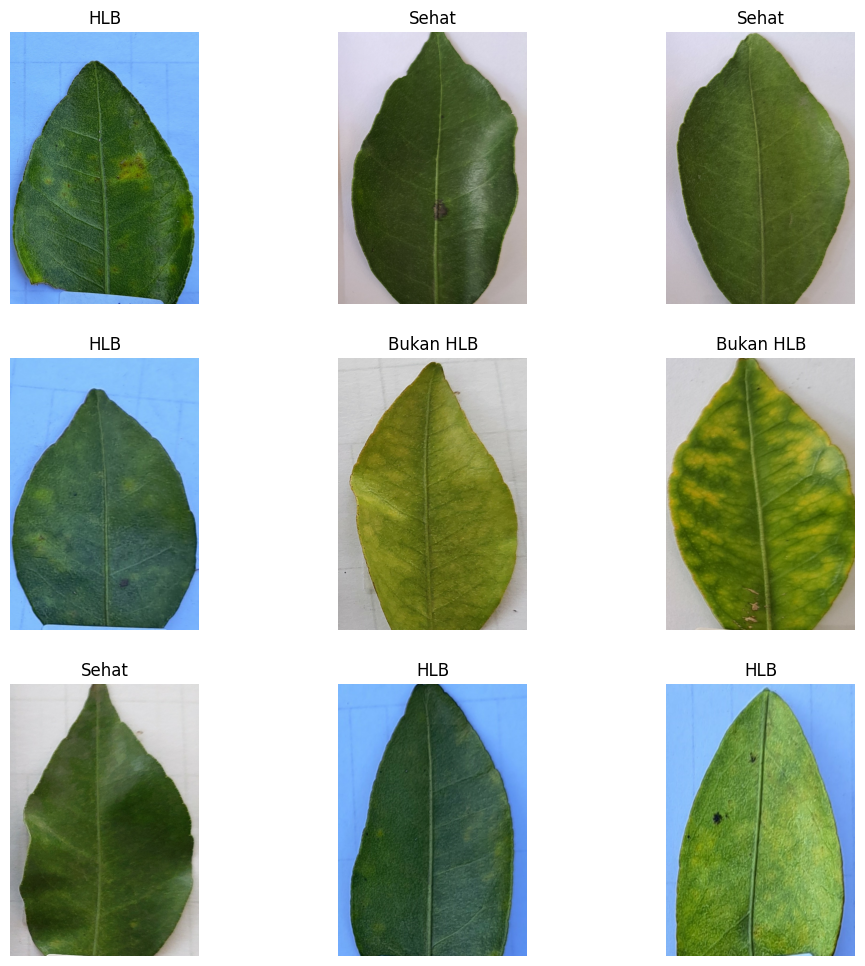

In [ ]:
import matplotlib.pyplot as plt
import numpy

train_class = train.class_names

plt.figure(figsize=(12,12))
for images, labels in train.take(1):
  for i in range (9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class[labels[i]])
    plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
file_path = '/content/drive/MyDrive/VGG_Adam.hdf5'

checkpoint = ModelCheckpoint(file_path,
                             monitor='val_accuracy',
                             verbose=2,
                             mode='max',
                             save_weights_only=False)

callbacks = [checkpoint]


In [ ]:
# Membuat objek model VGG16
vgg16 = VGG16(include_top=False, weights=None, input_shape=(656, 456, 3))

# Mengunci semua lapisan pada VGG16 agar tidak terlatih ulang
for layer in vgg16.layers:
    layer.trainable = False

# Membuat model baru berdasarkan VGG16
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Melatih model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train, epochs=30, batch_size=32, validation_data=val, callbacks=callbacks)

# Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(test)
print('Test accuracy:', test_acc)

Epoch 1/30
4/4 [==============================] - ETA: 0s - loss: 1.5514 - accuracy: 0.5000
Epoch 1: saving model to /content/drive/MyDrive/VGG_Adam.hdf5
4/4 [==============================] - 50s 7s/step - loss: 1.5514 - accuracy: 0.5000 - val_loss: 1.2313 - val_accuracy: 0.3571
Epoch 2/30
4/4 [==============================] - ETA: 0s - loss: 1.0672 - accuracy: 0.5377
Epoch 2: saving model to /content/drive/MyDrive/VGG_Adam.hdf5
4/4 [==============================] - 6s 1s/step - loss: 1.0672 - accuracy: 0.5377 - val_loss: 1.0356 - val_accuracy: 0.5714
Epoch 3/30
4/4 [==============================] - ETA: 0s - loss: 0.7301 - accuracy: 0.7170
Epoch 3: saving model to /content/drive/MyDrive/VGG_Adam.hdf5
4/4 [==============================] - 8s 2s/step - loss: 0.7301 - accuracy: 0.7170 - val_loss: 0.8357 - val_accuracy: 0.5000
Epoch 4/30
4/4 [==============================] - ETA: 0s - loss: 0.7049 - accuracy: 0.5849
Epoch 4: saving model to /content/drive/MyDrive/VGG_Adam.hdf5
4/4 [

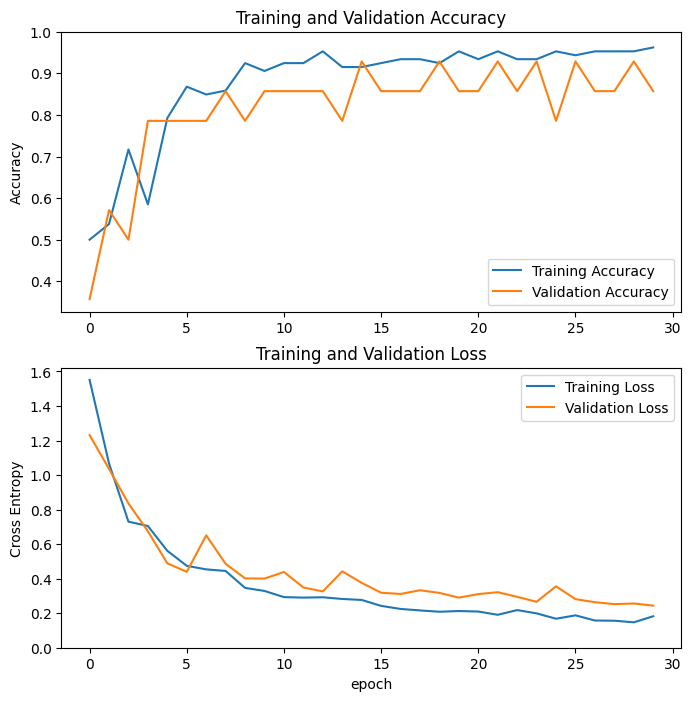

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/VGG_Adam.hdf5')
saved_model.evaluate(test)

1/1 [==============================] - 1s 723ms/step - loss: 0.2103 - accuracy: 0.9286


[0.21031984686851501, 0.9285714030265808]

Text(0.5, 1.0, 'Sehat')

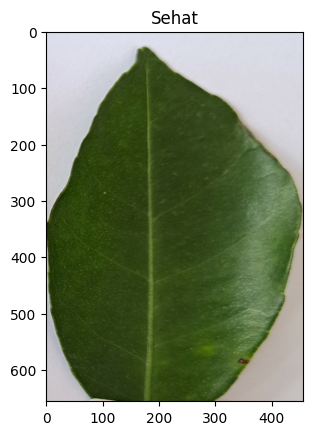

In [ ]:
image_batch, label_batch = test.as_numpy_iterator().next()
img = image_batch[0]
label = label_batch[0]

from numpy.lib.shape_base import expand_dims
x = expand_dims(img,axis=0)
x.shape

import matplotlib.pyplot as plt

plt.imshow(img/255)
plt.title(train_class[label])

In [ ]:
predict = model.predict(x)

import numpy as np

result_acc = np.amax(predict[0])
result_acc

1/1 [==============================] - 2s 2s/step


0.9888081

In [ ]:
result_idx = np.argmax(predict[0])
result_idx

2

In [ ]:
final_result = train_class[result_idx]
final_result

'Sehat'

1/1 [==============================] - 0s 31ms/step


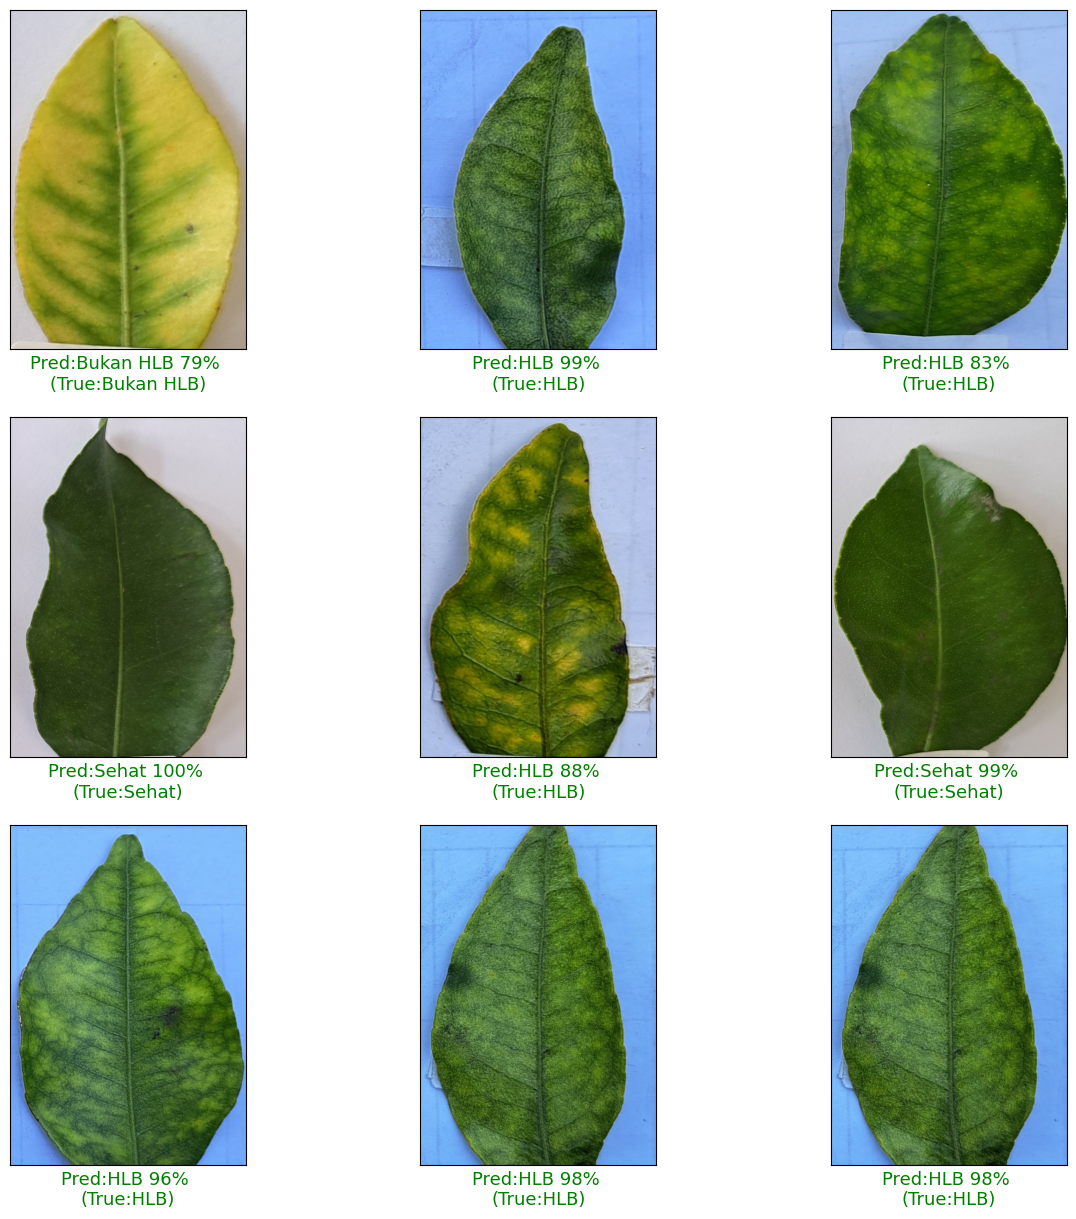

In [ ]:
import tensorflow as tf
from numpy.lib.shape_base import expand_dims
import numpy as np

plt.figure(figsize=(15,15))
for i in range(9):
  ax=plt.subplot(3,3,i+1)
  image_batch, label_batch = test.as_numpy_iterator().next()
  img = image_batch[0]
  label = label_batch[0]
  x = expand_dims(img,axis=0)

  true_label = train_class[label]

  plt.imshow(img/255)
  predict = model.predict(x)
  result_acc = np.amax(predict[0])
  result_idx = np.argmax(predict[0])
  final_result = train_class[result_idx]

  if true_label==final_result:
    color="green"
  else:
    color="red"

  plt.xlabel("Pred:{} {:2.0f}% \n(True:{})".format(final_result,
                                             100*tf.reduce_max(result_acc),
                                             true_label),
                                             color=color, fontsize=13
                                             )
  #Hide ticks
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
  ax.tick_params(axis='both', which='both', length=0)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
true_valid_labels = []

for images, labels in test:
  for label in labels:
        true_valid_labels.append(label.numpy())
  image_batch, label_batch = test.as_numpy_iterator().next()
  img = images
  label = labels
  x = expand_dims(img,axis=0)

  predict = model.predict(img)
  result_acc = np.amax(predict, axis=1)
  result_idx = np.argmax(predict, axis=1)

1/1 [==============================] - 0s 68ms/step


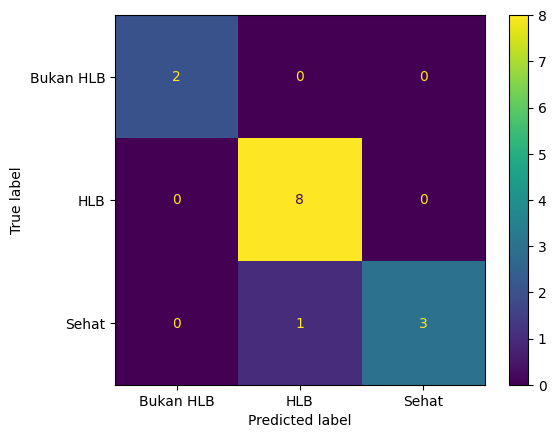

In [ ]:
cm = confusion_matrix(true_valid_labels, result_idx)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_class)
disp.plot()